<a href="https://colab.research.google.com/github/kain-shekar/CodeAlpha_Internship_Machine_learning_Projects/blob/main/Bike_Rental_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
BikeRentalData=pd.read_csv('BikeRentalData.csv',encoding='latin')
print('Shape before dropping duplicate values',BikeRentalData.shape)

BikeRentalData= BikeRentalData.drop_duplicates()

print('Shape after dropping duplicate values',BikeRentalData.shape)

Shape before dropping duplicate values (17379, 14)
Shape after dropping duplicate values (17377, 14)


In [ ]:
BikeRentalData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


## •	Defining the problem statement

Create a ML model which can predict the number of bikes which will be rented at a given hour of the day

Target Variable: cnt
    
Predictors: holiday, weather, registered users etc.

<Axes: >

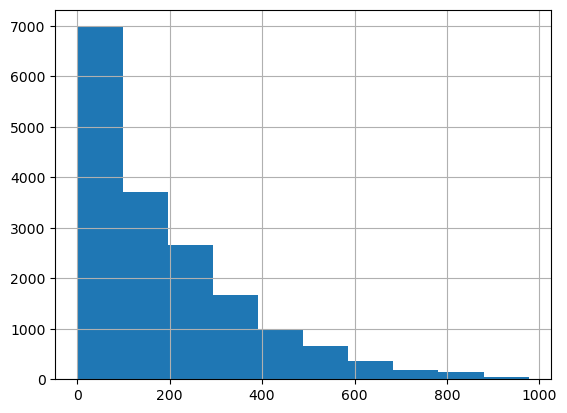

In [ ]:
BikeRentalData['cnt'].hist()

In [ ]:
BikeRentalData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [ ]:
BikeRentalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17377 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17377 non-null  int64  
 1   yr          17377 non-null  int64  
 2   mnth        17377 non-null  int64  
 3   hr          17377 non-null  int64  
 4   holiday     17377 non-null  int64  
 5   weekday     17377 non-null  int64  
 6   workingday  17377 non-null  int64  
 7   weathersit  17377 non-null  int64  
 8   temp        17377 non-null  float64
 9   atemp       17377 non-null  float64
 10  hum         17377 non-null  float64
 11  windspeed   17377 non-null  float64
 12  registered  17377 non-null  int64  
 13  cnt         17377 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.0 MB


In [ ]:
BikeRentalData.describe(include='all')

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,153.803649,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,151.357913,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


In [ ]:
BikeRentalData.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
registered    776
cnt           869
dtype: int64

season: Categorical. Selected.
    
yr: Qualitative. Rejected. The year value is like an ID just for reference.
    
mnth: Categorical. Selected.

hr: Categorical. Selected.
    
holiday: Categorical. Selected.
    
weekday: Categorical. Selected.
    
workingday: Categorical. Selected.
    
weathersit: Categorical. Selected.
    
temp: Continuous. Selected.
    
atemp: Continuous. Selected.
    
hum: Continuous. Selected.
    
windspeed: Continuous. Selected.
    
casual: Continuous. Selected.
    
registered: Continuous. Selected.
    
cnt: Continuous. Selected.This is the Target Variable!

In [ ]:
BikeRentalData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


## Removing useless columns from the data

In [ ]:
UselessColumns = ['yr']
BikeRentalData = BikeRentalData.drop(UselessColumns,axis=1)
BikeRentalData.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


## Visual Exploratory Data Analysis
•Categorical variables: Bar plot
    
•Continuous variables: Histogram
Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
Based on the Basic Data Exploration above, we have spotted three categorical predictors in the data


array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'registered'}>, <Axes: >]], dtype=object)

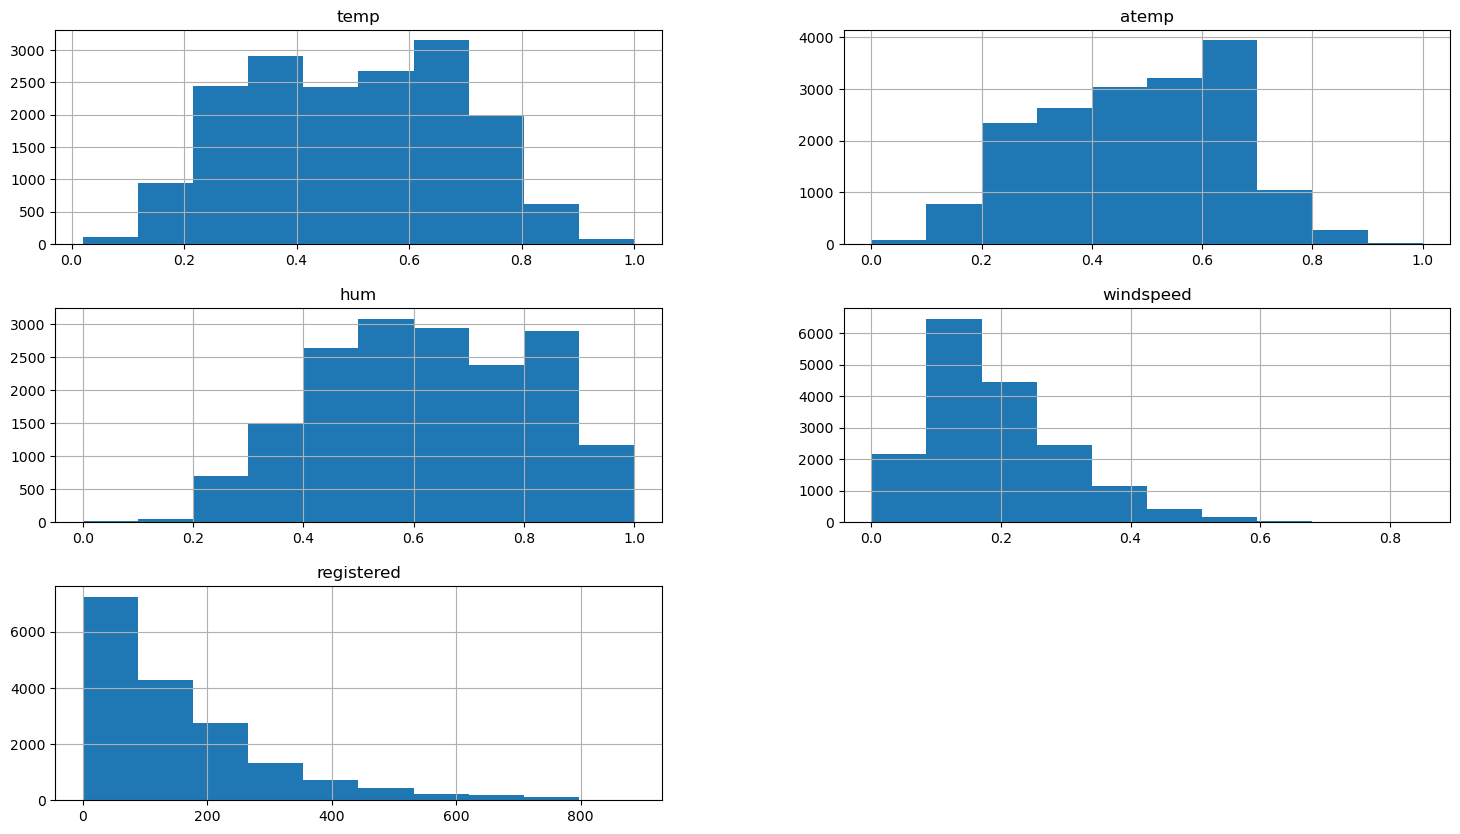

In [ ]:
BikeRentalData.hist(['temp','atemp','hum','windspeed','registered'], figsize=(18,10))

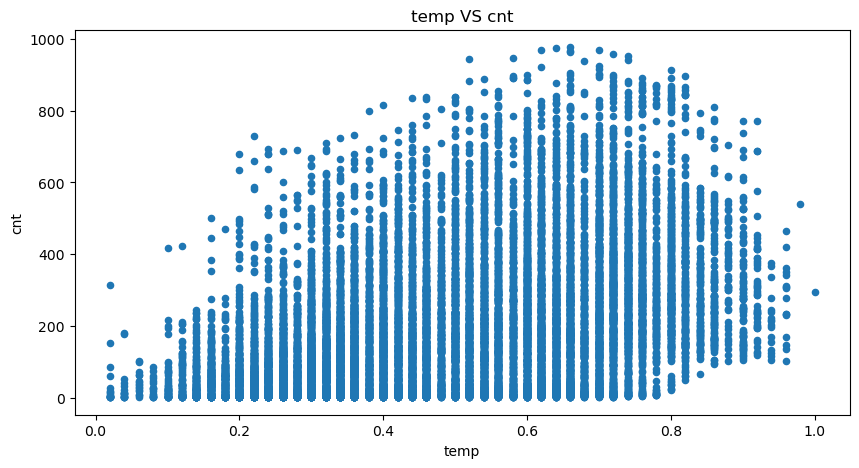

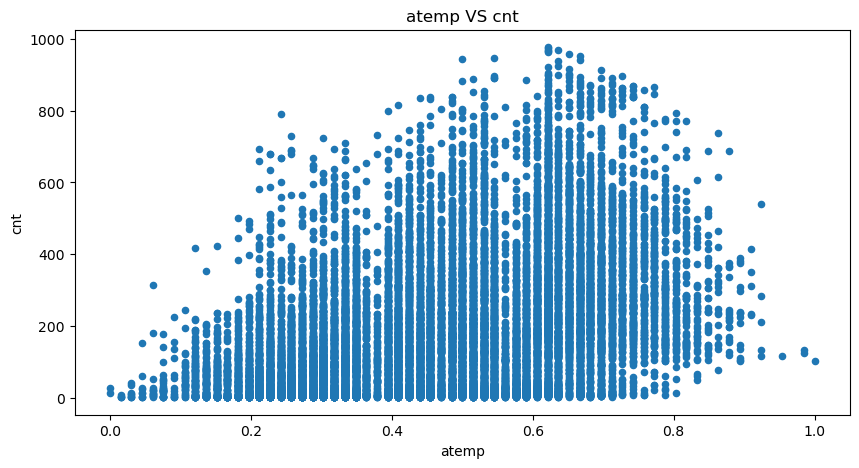

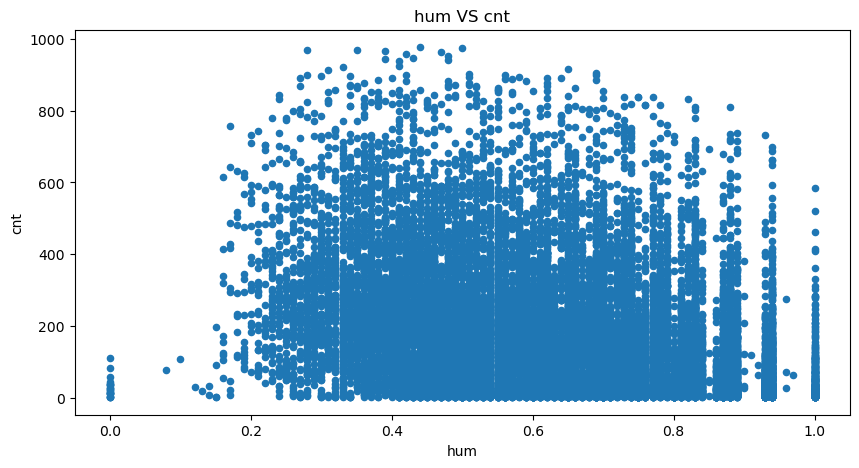

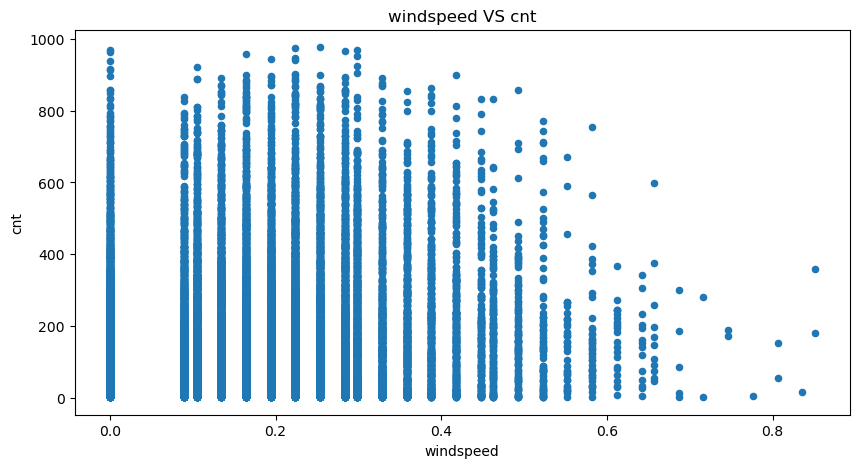

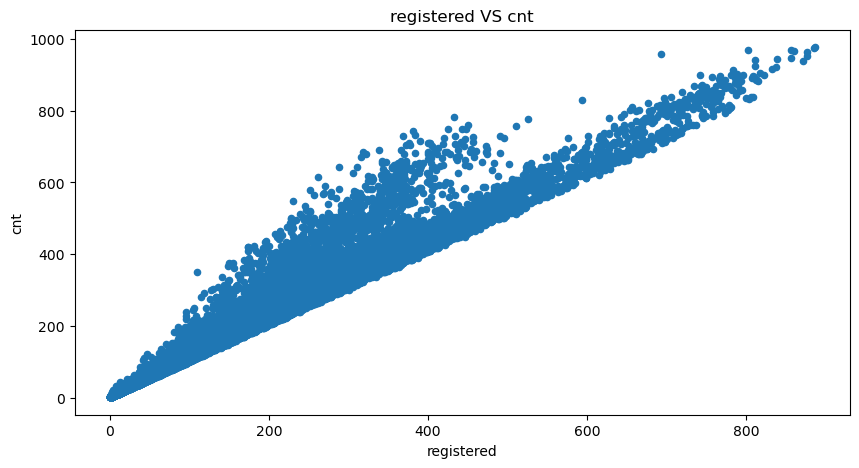

In [ ]:
ContinuousCols=['temp','atemp','hum','windspeed','registered']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BikeRentalData.plot.scatter(x=predictor, y='cnt', figsize=(10,5), title=predictor+" VS "+ 'cnt')

In [ ]:
# Calculating correlation matrix
ContinuousCols=['cnt','temp','atemp','hum','windspeed','registered']

# Creating the correlation matrix
CorrelationData=BikeRentalData[ContinuousCols].corr()
CorrelationData

,cnt,temp,atemp,hum,windspeed,registered
cnt,1.000000,0.404798,0.400950,-0.322872,0.093155,0.972148
temp,0.404798,1.000000,0.987671,-0.069931,-0.023141,0.335377
atemp,0.400950,0.987671,1.000000,-0.051960,-0.062357,0.332571
hum,-0.322872,-0.069931,-0.051960,1.000000,-0.290070,-0.273891
windspeed,0.093155,-0.023141,-0.062357,-0.290070,1.000000,0.082244
registered,0.972148,0.335377,0.332571,-0.273891,0.082244,1.000000


In [ ]:
BikeRentalData.corr().sum()

season        2.796782
mnth          2.537797
hr            1.867443
holiday       0.494461
weekday       0.954382
workingday    1.119144
weathersit    0.974224
temp          3.209951
atemp         3.177636
hum           0.415977
windspeed     0.681791
registered    3.106770
cnt           3.124856
dtype: float64

In [ ]:
BikeRentalData.shape

(17377, 13)

### To check missing Values

In [ ]:
BikeRentalData.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

In [ ]:
BikeRentalData.describe()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,153.803649,189.483916
std,1.106917,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,151.357913,181.387645
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


### To check Outliers

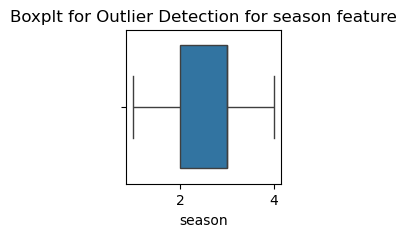

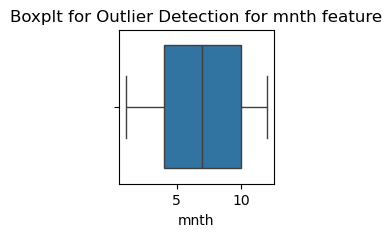

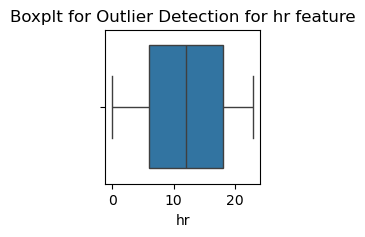

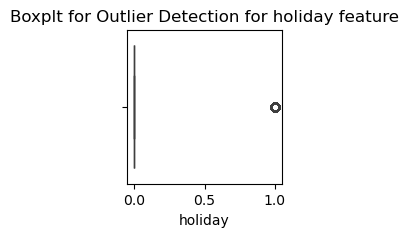

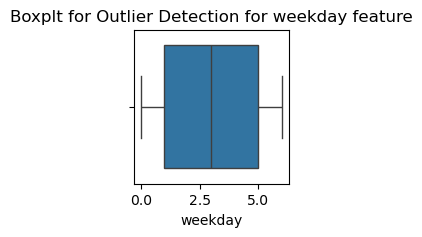

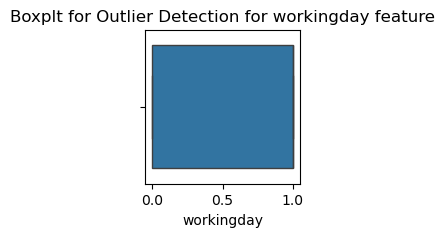

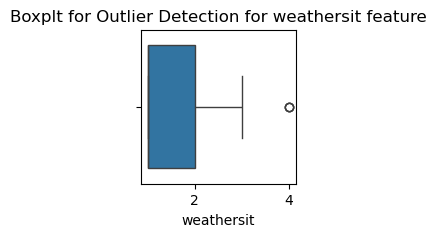

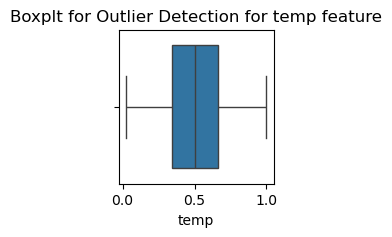

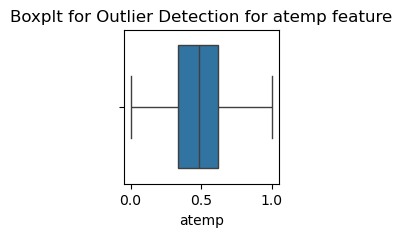

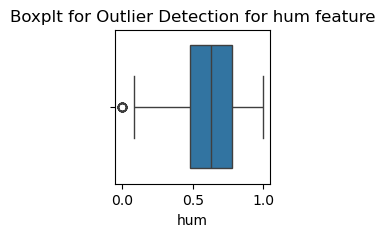

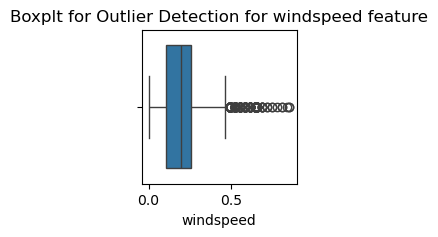

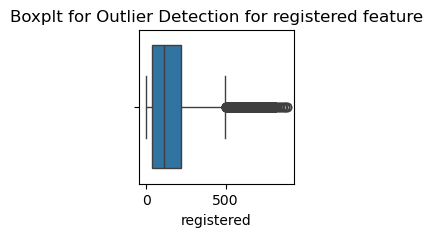

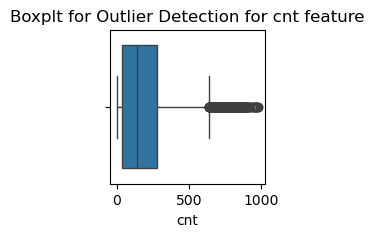

In [ ]:
# to plot BoxPlot
for col in BikeRentalData.columns:
    plt.figure(figsize=(2,2))
    sns.boxplot(x=BikeRentalData[col])
    plt.title(f"Boxplt for Outlier Detection for {col} feature")
    plt.show()


### To Remove Outliers

In [ ]:
wt_outliers = BikeRentalData.copy()

for col in BikeRentalData.columns:
    q1 = BikeRentalData[col].quantile(0.25)
    q3 = BikeRentalData[col].quantile(0.75)
    IQR = q3-q1
    lf = q1-(1.5*IQR)
    hf = q1+(1.5*IQR)
wt_outliers = wt_outliers[ (BikeRentalData[col]>=lf) & (BikeRentalData[col]<=hf) ]

In [ ]:
wt_outliers.shape

(15107, 13)

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
for i in wt_outliers.columns:
    wt_outliers[col] = lb.fit_transform(wt_outliers[col])

In [ ]:
wt_outliers

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,15
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,39
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,31
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,12
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,108,118
17375,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,81,88
17376,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,83,89
17377,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,48,60


## Split Dependent colums and independent columns

In [ ]:
# dependent features
X = wt_outliers.drop(columns='cnt')

# dependent Feature
y = wt_outliers['cnt']

### split into X_test , y_test

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
print(y_train.value_counts())
print(X_train.shape , y_train.shape)

cnt
4      216
5      191
3      190
1      173
6      159
      ... 
344      7
378      7
400      6
363      5
392      5
Name: count, Length: 401, dtype: int64
(12085, 12) (12085,)


### To convert into Normal Distribution
* Min-Max scaler
* standardScaler

In [ ]:
# Fit the scaler on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
a = pd.DataFrame(X_train,columns=X.columns)
a

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,-1.298653,-1.550339,-0.995007,-0.173461,-1.000469,0.678935,-0.689264,-1.460485,-1.535612,-0.270868,0.301650,-1.183656
1,0.476712,0.720019,-0.154729,-0.173461,0.496827,0.678935,-0.689264,0.534193,0.504162,-0.583343,-0.798248,0.528083
2,0.476712,0.436224,-0.714914,-0.173461,-0.501370,0.678935,2.364165,0.849142,0.681508,0.979033,0.056773,-0.510004
3,0.476712,-0.131365,0.685549,-0.173461,-0.501370,0.678935,-0.689264,2.003955,2.011312,-0.895819,0.790584,1.223822
4,1.364394,1.287609,1.665873,-0.173461,-1.499568,-1.472895,-0.689264,-0.620620,-0.648881,0.093687,0.301650,-0.620439
...,...,...,...,...,...,...,...,...,...,...,...,...
12080,0.476712,0.436224,-1.415145,-0.173461,-1.000469,0.678935,-0.689264,1.059108,1.036201,0.770717,-0.798248,-1.062177
12081,1.364394,1.003814,1.665873,-0.173461,1.495025,-1.472895,-0.689264,-0.200688,-0.116842,-0.114630,-0.432161,0.362431
12082,0.476712,0.720019,-0.574868,-0.173461,0.496827,0.678935,-0.689264,0.639176,0.681508,0.718637,-1.532059,2.493821
12083,-1.298653,-1.266544,-0.574868,-0.173461,-0.501370,0.678935,-0.689264,-1.250519,-1.535612,0.041607,1.890481,-0.134526


In [ ]:
print(X_train.shape)
print(X_test.shape)

(12085, 12)
(3022, 12)


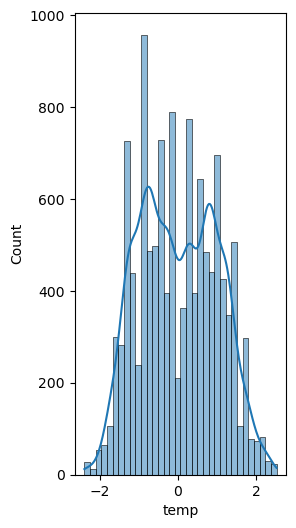

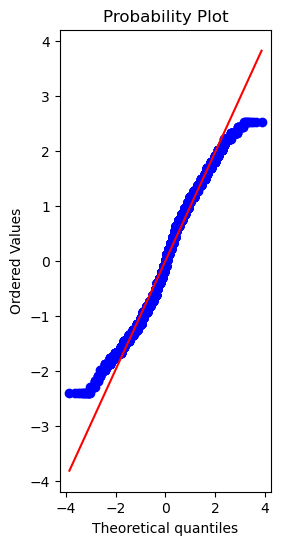

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot histogram
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
sns.histplot(a['temp'], kde=True)

# Q-Q Plot for normality check
plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
stats.probplot(a['temp'], dist="norm", plot=plt)
plt.show()

## 5. Model Selection
* Choose Algorithms: Decide on a baseline model and other potential algorithms to experiment with based on the problem type (e.g., linear regression, random forests, neural networks).
* Baseline: Train a simple model for comparison.

### Linear Regression

In [ ]:
# logistic Regression

from sklearn.linear_model import LinearRegression
logRegModel = LinearRegression()
logRegModel.fit(X_train,y_train)
y_pred=logRegModel.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def toCheckAccuracy(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R²):", r2)

In [ ]:
toCheckAccuracy(y_test,y_pred)

Mean Absolute Error (MAE): 15.111302246602055
Mean Squared Error (MSE): 469.1905892935893
Root Mean Squared Error (RMSE): 21.660807678699086
R-squared (R²): 0.9629713924288127


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTC = DecisionTreeRegressor()
DTC.fit(X_train,y_train)
y_pred=DTC.predict(X_test)

toCheckAccuracy(y_test,y_pred)

Mean Absolute Error (MAE): 10.877564526803441
Mean Squared Error (MSE): 337.5043017868961
Root Mean Squared Error (RMSE): 18.371290150310514
R-squared (R²): 0.9733640984503324


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

# TO check the accuracy
toCheckAccuracy(y_test,y_pred)

Mean Absolute Error (MAE): 7.985632031767042
Mean Squared Error (MSE): 170.02162951687623
Root Mean Squared Error (RMSE): 13.039234238132094
R-squared (R²): 0.9865818617388022


### KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

toCheckAccuracy(y_test , y_pred)

Mean Absolute Error (MAE): 19.31032428855063
Mean Squared Error (MSE): 705.0827134348114
Root Mean Squared Error (RMSE): 26.55339363310858
R-squared (R²): 0.9443547426210871


### SVM

In [ ]:
from sklearn import svm

svm = svm.SVR()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

toCheckAccuracy(y_test,y_pred)

Mean Absolute Error (MAE): 18.92467651538351
Mean Squared Error (MSE): 994.6697604544539
Root Mean Squared Error (RMSE): 31.5383855080512
R-squared (R²): 0.9215004796275905


### Model Accuracy
* logistic Regression - R-squared (R²): 0.9629713924288127
* Decision Tree       - R-squared (R²): 0.9733640984503324
* Random Forest - R-squared (R²): 0.9865818617388022
* KNN - R-squared (R²): 0.9443547426210871
* SVM - R-squared (R²): 0.9215004796275905